# Ifaz Chowdhury 

## Research question/interests

 **My research question dives into the correlation between Expected Goals on a per 90 minute basis (xG90) and Expected Assists on a per 90 minute basis (xG90).** The reason why I chose these two statistics to take a deeper analysis into is because the Expected metrics highlights a player’s performance based off of how many goals/assists they should have scored. Furthermore, the reason why I’m choosing per 90 minute metrics to evaluate this data is because I want to assess the use of per 90 minute metrics to evaluate players and whether they are a reliable statistic to judge player performance.

## Legend

**Football jargon:**

xG90 = Expected Goals per 90 minutes

xA90 = Expected Assists per 90 minutes

xG = Expected Goals

xA= Expected Assists

G = Actual Goals

A = Actual Assists

**Statistics:** 

MSE = Mean Squared Error deviation

RMSE = Root Mean Squared Error deviation

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math 
df = pd.read_csv('../data/raw/Premier_League_players.csv')
df.head()

,№,Player,Team,Apps,Min,G,A,xG,G - xG,xA,xA - A,xG90,xA90
0,1,Son Heung-Min,Tottenham,35,3051,23,7,16.99,6.01,7.85,-0.85,0.50,0.23
1,2,Mohamed Salah,Liverpool,35,2757,23,13,24.36,-1.36,9.79,3.21,0.80,0.32
2,3,Cristiano Ronaldo,Manchester United,30,2468,18,3,17.21,0.79,4.42,-1.42,0.63,0.16
3,4,Harry Kane,Tottenham,37,3229,17,9,20.69,-3.69,9.82,-0.82,0.58,0.27
4,5,Sadio Mané,Liverpool,34,2833,16,2,16.83,-0.83,5.27,-3.27,0.53,0.17


In [3]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,№,Apps,Min,G,A,xG,G - xG,xA,xA - A,xG90,xA90
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,269.000000,19.525140,1399.392924,1.931099,1.383613,2.046629,-0.115531,1.451564,-0.067952,0.151080,0.106164
std,155.162818,11.643965,1025.156979,3.278847,2.049288,3.161298,1.228107,1.871564,1.079088,0.348329,0.401948
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-5.810000,0.000000,-4.010000,0.000000,0.000000
25%,135.000000,9.000000,410.000000,0.000000,0.000000,0.090000,-0.510000,0.070000,-0.500000,0.010000,0.010000
50%,269.000000,21.000000,1356.000000,1.000000,1.000000,0.800000,-0.050000,0.740000,-0.030000,0.060000,0.060000
75%,403.000000,30.000000,2211.000000,2.000000,2.000000,2.650000,0.090000,2.130000,0.150000,0.190000,0.140000
max,537.000000,38.000000,3420.000000,23.000000,13.000000,24.360000,9.050000,12.690000,5.520000,6.310000,8.940000


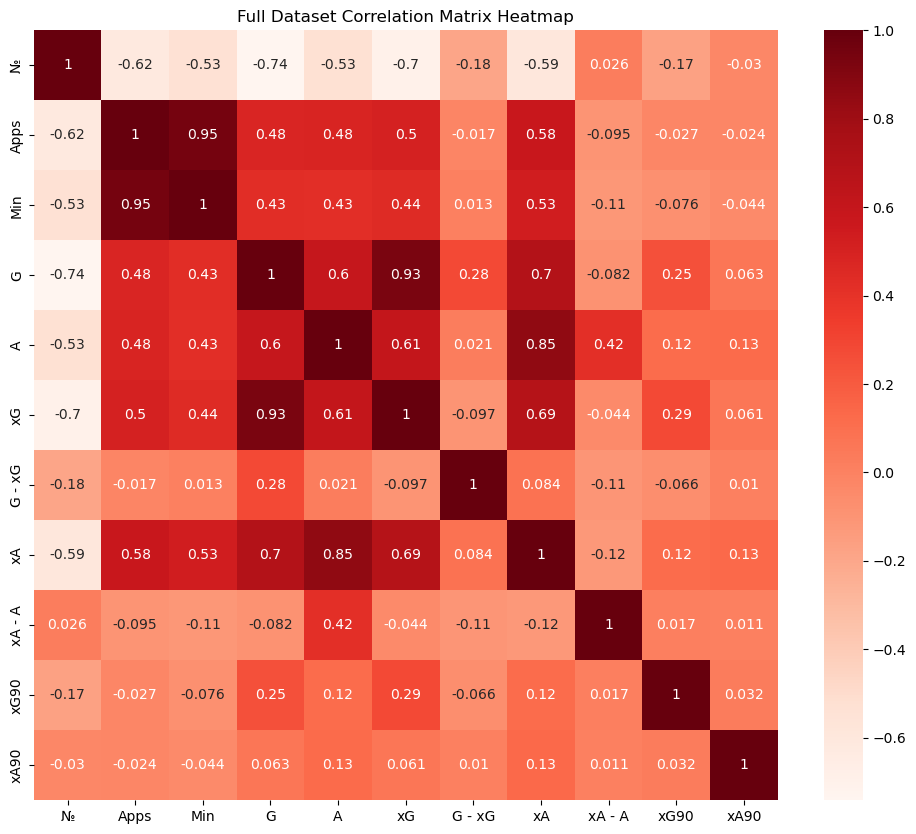

In [64]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Full Dataset Correlation Matrix Heatmap')
plt.show()

Looking at the dataset as a whole, the **Pearson Correlation helps us find correlations between different variables in our dataset.** We can see here that xG90 (Expected Goals per 90 mins) and xA90 (Expected Assists per 90 mins) are loosely correlated (+0.032). [I could have dropped some rows to better visualize the correlation between these 2 variables however I wanted to see a holistic correlation between all the variables of this dataset]. Now we move on to making plots of the 2 datapoints to visualize what this correlation is like.

Text(0.5, 1.0, 'Expected Goals per 90 vs Expected Assists per 90')

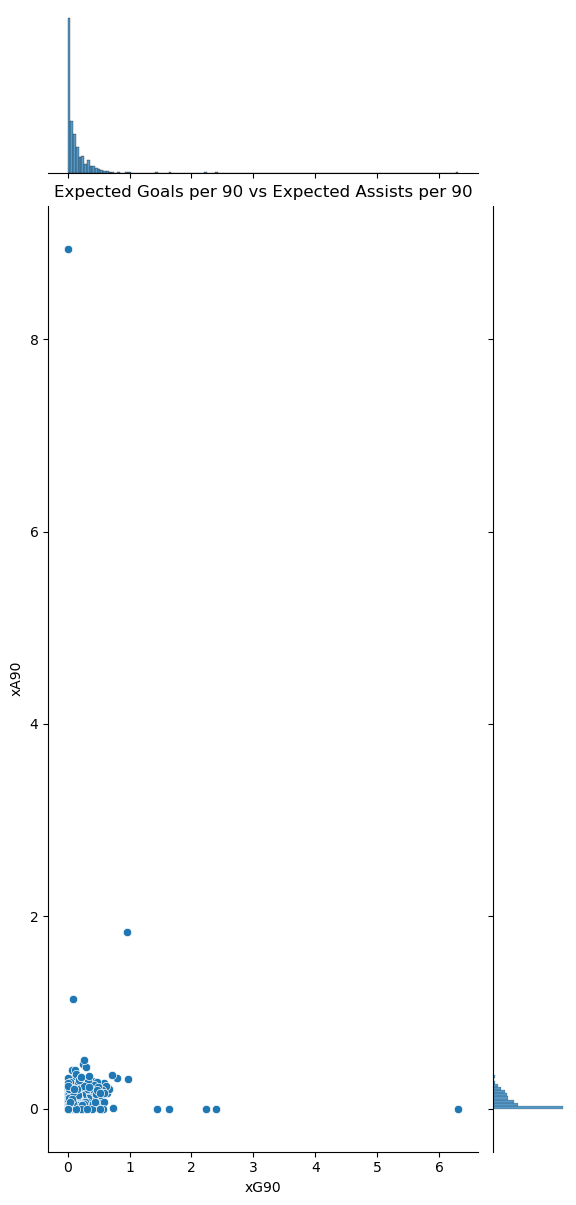

In [36]:
sns.jointplot(x='xG90',y='xA90', data=df)
plt.subplots_adjust(top=2)
plt.title("Expected Goals per 90 vs Expected Assists per 90")

Looks like there are few massive outliers but no

In [37]:
def data_no_outlier(df):
    #method chaining 1 : taking off the outliers
    xG90_data = np.array(df['xG90'])
    xG90_low, xG90_hgh = np.percentile(xG90_data, [1, 99])
    print(xG90_low, xG90_hgh)
    df_no_outlier_xG90 = df.copy()[df['xG90'].between(xG90_low, xG90_hgh)]

    print(len(df_no_outlier_xG90))
    #df_no_outlier_xG90.head()
    xA90_data = np.array(df['xA90'])
    xA90_low, xA90_hgh = np.percentile(xA90_data, [1, 99])
    print(xA90_low, xA90_hgh)
    df_no_outlier = df_no_outlier_xG90.copy()[df_no_outlier_xG90['xA90'].between(xA90_low, xA90_hgh)]

    print(len(df_no_outlier))
    #df_no_outlier.head()
    return df_no_outlier

In [38]:
df_no_outlier= data_no_outlier(df)

0.0 0.9727999999999997
531
0.0 0.4191999999999996
525


Text(0.5, 1.0, 'Expected Goals per 90 vs Expected Assists per 90 (Filtered Outliers)')

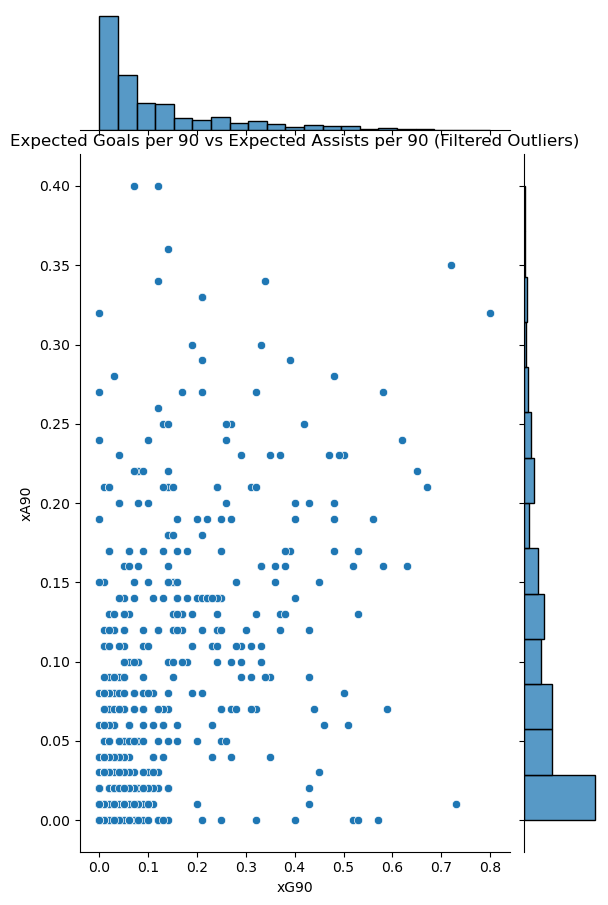

In [39]:
sns.jointplot(x='xG90',y='xA90', data=df_no_outlier)
plt.subplots_adjust(top=1.5)
plt.title("Expected Goals per 90 vs Expected Assists per 90 (Filtered Outliers)")

We see that the data is more concentrated in the bottom left, but are there any real tendency? we want to look for ratios, we will drop zeros for now

In [40]:
print(df_no_outlier['xA90'].min(), df_no_outlier['xA90'].max(), df_no_outlier['xG90'].min(), df_no_outlier['xG90'].max())

0.0 0.4 0.0 0.8


In [41]:
def clean_zeros(df):
    #method chaining 2 : taking off the zeros
    df_no_zero = df.copy()[df['xA90'].between(0.000001, df['xA90'].max())]
    df_no_zero2 = df_no_zero.copy()[df_no_zero['xG90'].between(0.000001, df_no_outlier['xG90'].max())]
    
    return df_no_zero2


In [42]:
df_detailed= clean_zeros(df_no_outlier)

/Users/ifazchowdhury/opt/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Relationship between Expected Goals per 90 mins and Expected Assists per 90 mins')

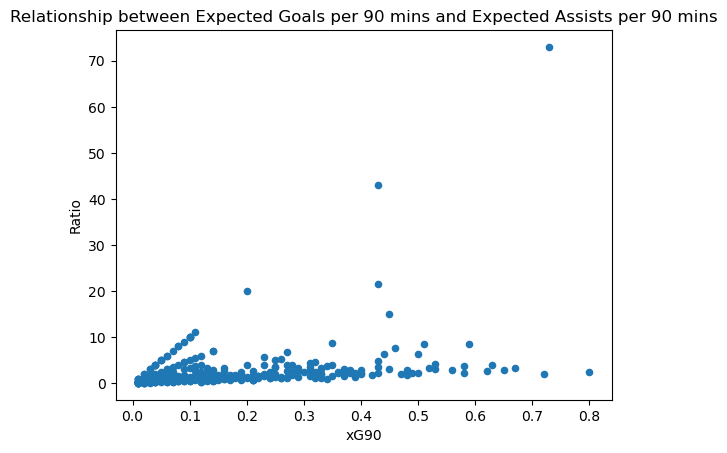

In [43]:
df_detailed['Ratio'] = df_detailed['xG90'] / df_detailed['xA90']
df_detailed.plot(kind='scatter', x='xG90', y='Ratio')
plt.title('Relationship between Expected Goals per 90 mins and Expected Assists per 90 mins')

The data is in the bottom triangle, but this is related to the limited nature of xA90

In [44]:
Ratio_data = np.array(df_detailed['Ratio'])
print(Ratio_data.min(), Ratio_data.max(), math.sqrt(len(Ratio_data)))


0.04761904761904762 73.0 19.595917942265423


Text(0.5, 1.0, 'Distribution of Ratios')

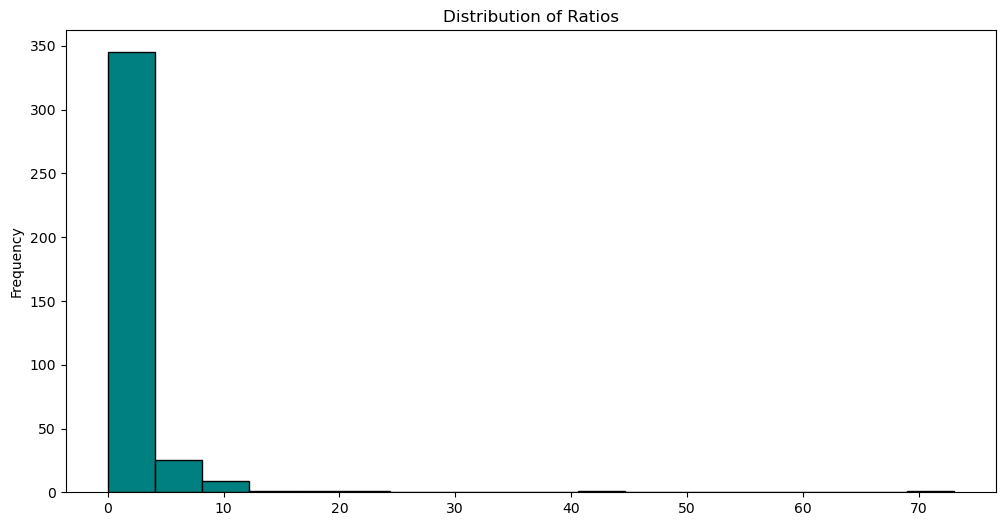

In [45]:
Ratio_bins = np.linspace(Ratio_data.min(), Ratio_data.max(), 19)
df_detailed['Ratio'].plot(kind='hist', bins=Ratio_bins, figsize=(12,6), facecolor='teal',edgecolor='black')
plt.title('Distribution of Ratios')

We are trying to understand the nature of the ratio 'xG90' / 'xA90'. Here, we see that there are outliers and the chosen gap was not appropriate

Text(0.5, 1.0, 'Distribution of Ratios (Smaller bins)')

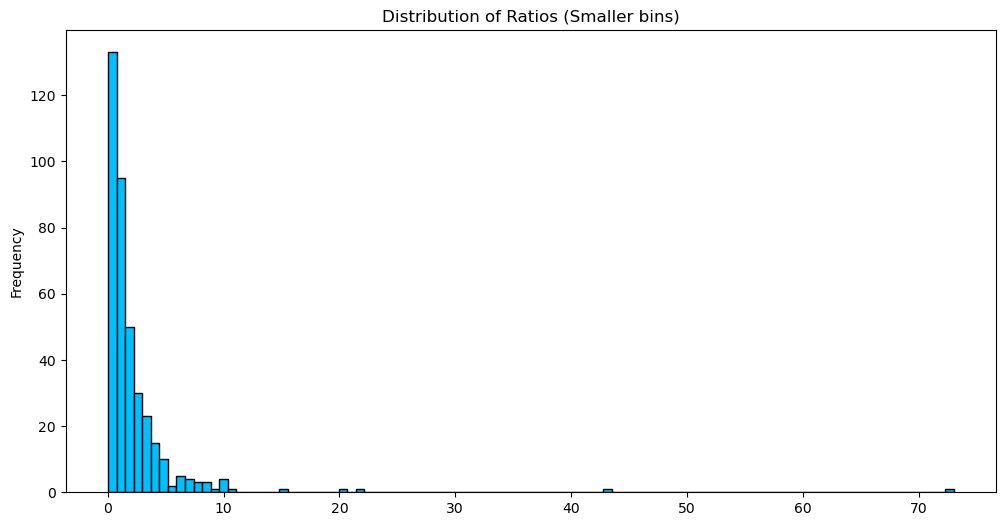

In [46]:
Ratio_bins = np.linspace(Ratio_data.min(), Ratio_data.max(), 100)
df_detailed['Ratio'].plot(kind='hist', bins=Ratio_bins, figsize=(12,6), facecolor='deepskyblue',edgecolor='black')
plt.title('Distribution of Ratios (Smaller bins)')

The same data than above, but with smaller bins

What if we will not look fot outliers ?

In [47]:
Ratio_low, Ratio_hgh = np.percentile(Ratio_data, [1, 99])
print(Ratio_low, Ratio_hgh)

0.09090909090909091 15.850000000000081


In [48]:
df_popularRatios = df_detailed.copy()[df_detailed['Ratio'].between(Ratio_low, Ratio_hgh)]
df_popularRatios.head()

,№,Player,Team,Apps,Min,G,A,xG,G - xG,xA,xA - A,xG90,xA90,Ratio
0,1,Son Heung-Min,Tottenham,35,3051,23,7,16.99,6.01,7.85,-0.85,0.50,0.23,2.173913
1,2,Mohamed Salah,Liverpool,35,2757,23,13,24.36,-1.36,9.79,3.21,0.80,0.32,2.500000
2,3,Cristiano Ronaldo,Manchester United,30,2468,18,3,17.21,0.79,4.42,-1.42,0.63,0.16,3.937500
3,4,Harry Kane,Tottenham,37,3229,17,9,20.69,-3.69,9.82,-0.82,0.58,0.27,2.148148
4,5,Sadio Mané,Liverpool,34,2833,16,2,16.83,-0.83,5.27,-3.27,0.53,0.17,3.117647


In [49]:
Ratio_data = np.array(df_popularRatios['Ratio'])
print(Ratio_data.min(), Ratio_data.max(), math.sqrt(len(Ratio_data)))

0.09090909090909091 15.000000000000002 19.4164878389476


Text(0.5, 1.0, '1-99 percentiles of Expected Goals per 90 mins and Expected Assists per 90 mins')

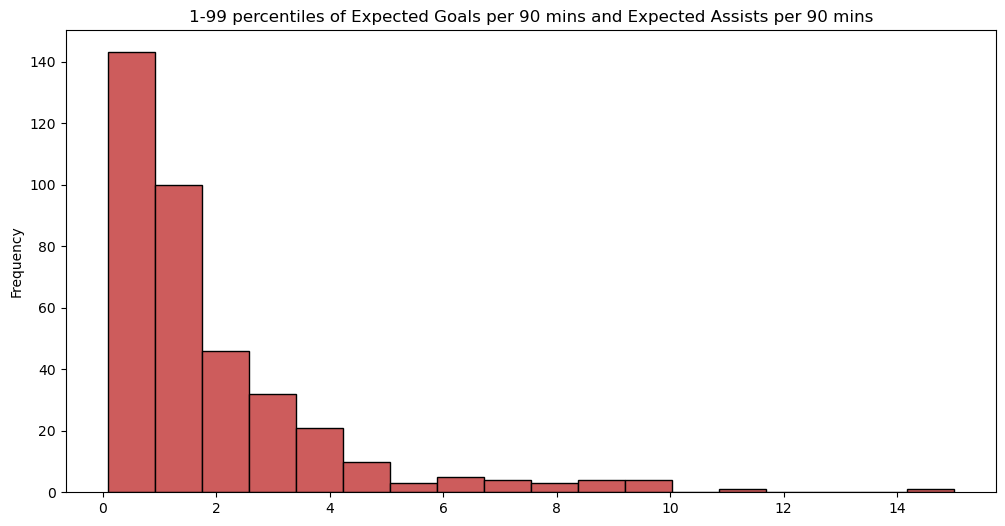

In [58]:
Ratio_bins = np.linspace(Ratio_data.min(), Ratio_data.max(), 19)
df_popularRatios['Ratio'].plot(kind='hist', bins=Ratio_bins, figsize=(12,6), facecolor='indianred',edgecolor='black')
plt.title('1-99 percentiles of Expected Goals per 90 mins and Expected Assists per 90 mins')

The df_detailed['xG90'] / df_detailed['xA90'] histogram of 1-99 percentiles of this value

Let's look more in details, if there are any relationship?

In [51]:
df_no_outlier.head()

,№,Player,Team,Apps,Min,G,A,xG,G - xG,xA,xA - A,xG90,xA90
0,1,Son Heung-Min,Tottenham,35,3051,23,7,16.99,6.01,7.85,-0.85,0.50,0.23
1,2,Mohamed Salah,Liverpool,35,2757,23,13,24.36,-1.36,9.79,3.21,0.80,0.32
2,3,Cristiano Ronaldo,Manchester United,30,2468,18,3,17.21,0.79,4.42,-1.42,0.63,0.16
3,4,Harry Kane,Tottenham,37,3229,17,9,20.69,-3.69,9.82,-0.82,0.58,0.27
4,5,Sadio Mané,Liverpool,34,2833,16,2,16.83,-0.83,5.27,-3.27,0.53,0.17


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

We look all the data and try to understand if the behaviour of xA90 can be predicted basing on ANY of the variables. We took the data without outliers

Text(0.5, 1.0, 'Expected Assists per 90 mins')

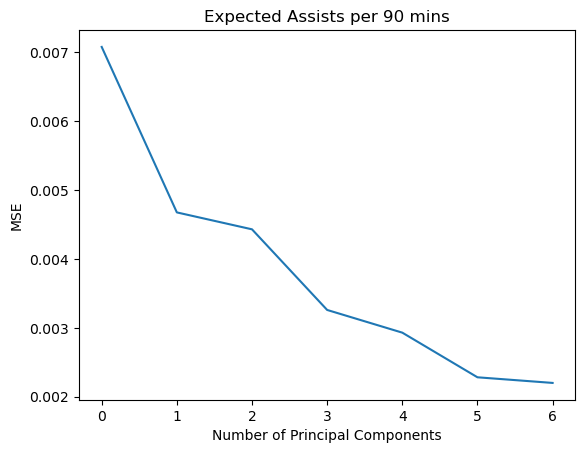

In [53]:
#define predictor and response variables
X = df_no_outlier[["G", "A", "xG", "xA", "xG90", "Apps", "Min"]]
y = df_no_outlier[["xA90"]]

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 7):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Expected Assists per 90 mins')

The plot displays the number of principal components along the x-axis and the test MSE (mean squared error) along the y-axis.
The method is the same than in https://www.statology.org/principal-components-regression-in-python/ article

In [20]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([63.  , 82.92, 92.77, 96.8 , 98.61, 99.41, 99.99])


    By using just the first principal component, we can explain 63% of the variation in the response variable.
    By adding in the second principal component, we can explain 82.92% of the variation in the response variable.


For now, we are trying to take a look for a different baseline regression models, as in https://towardsdatascience.com/principal-component-regression-clearly-explained-and-implemented-608471530a2f article

In [21]:
target = 'xA90'
X = df_no_outlier.drop(target,axis=1)
y = df_no_outlier[target]

In [22]:
df_no_outlier.columns

Index(['№', 'Player', 'Team', 'Apps', 'Min', 'G', 'A', 'xG', 'G - xG', 'xA',
       'xA - A', 'xG90', 'xA90'],
      dtype='object')

In [23]:
#method chaining 3 : cleaning the data for the regressions
df2 = (
    df_no_outlier.copy().drop('Player', axis=1)
    .drop('Team', axis=1)
    .drop('№', axis=1)
)

df2.head()

,Apps,Min,G,A,xG,G - xG,xA,xA - A,xG90,xA90
0,35,3051,23,7,16.99,6.01,7.85,-0.85,0.50,0.23
1,35,2757,23,13,24.36,-1.36,9.79,3.21,0.80,0.32
2,30,2468,18,3,17.21,0.79,4.42,-1.42,0.63,0.16
3,37,3229,17,9,20.69,-3.69,9.82,-0.82,0.58,0.27
4,34,2833,16,2,16.83,-0.83,5.27,-3.27,0.53,0.17


In [24]:
target = 'xA90'
X = df2.drop(target,axis=1)
y = df2[target]

In [25]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

# Run standardization on X variables
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [26]:
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [27]:
# Define cross-validation folds
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Linear Regression
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
lr_score_train = -1 * cross_val_score(lin_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
lr_score_test = mean_squared_error(y_test, lin_reg.predict(X_test_scaled), squared=False)

# Lasso Regression
lasso_reg = LassoCV().fit(X_train_scaled, y_train)
lasso_score_train = -1 * cross_val_score(lasso_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
lasso_score_test = mean_squared_error(y_test, lasso_reg.predict(X_test_scaled), squared=False)

# Ridge Regression
ridge_reg = RidgeCV().fit(X_train_scaled, y_train)
ridge_score_train = -1 * cross_val_score(ridge_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
ridge_score_test = mean_squared_error(y_test, ridge_reg.predict(X_test_scaled), squared=False)

In [28]:
print(lr_score_test, lasso_score_test, ridge_score_test)

0.038532985490181616 0.03889538412177756 0.03860132588402654


In [29]:
# Generate all the principal components
pca = PCA() # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(X_train_scaled)

# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1,2,3,4,5,6,7,8
0,0.366750,-0.439456,0.156227,-0.157176,-0.299174,0.253783,0.685092,0.000000e+00,0.000000e+00
1,0.338315,-0.521831,0.155509,-0.131258,-0.283723,-0.012081,-0.700842,5.102984e-16,1.657053e-16
2,0.421781,0.141674,-0.273012,0.234536,-0.152082,-0.397635,0.062036,5.090007e-01,4.778218e-01
3,0.362492,0.188066,0.470443,0.148319,0.340957,0.081239,-0.027868,-4.673608e-01,4.978571e-01
4,0.430630,0.216179,-0.216345,-0.108951,-0.106389,-0.499334,0.070992,-4.855154e-01,-4.557751e-01


In [30]:
pca.explained_variance_ratio_

array([4.76316589e-01, 1.59110225e-01, 1.46543475e-01, 1.22818198e-01,
       6.53034264e-02, 2.51316470e-02, 4.77644034e-03, 1.02579127e-32,
       6.54939103e-33])

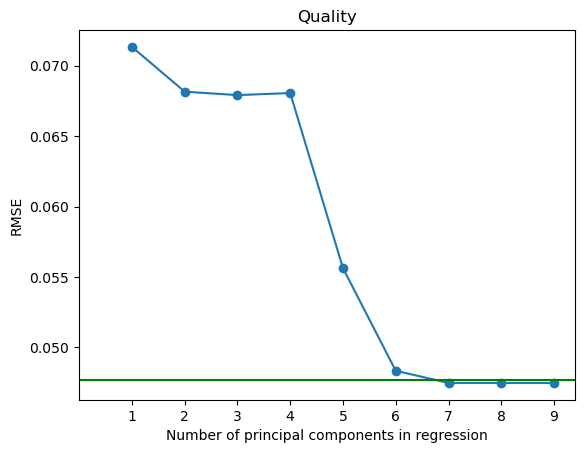

In [31]:
# Initialize linear regression instance
lin_reg = LinearRegression()

# Create empty list to store RMSE for each iteration
rmse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
    
# Visual analysis - plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-')

Looks like 6-7 principal components is the optimal

In [32]:
y.mean()

0.08262857142857144

If the mean squared errors are 0.038532985490181616 0.03889538412177756 0.03860132588402654 for different regression models, the mean value of xA90 is 0.08262857142857148. Thus, there values are close enough to each other

In [33]:
# Visually determine optimal number of principal components
best_pc_num = 7
# Train model with first 7 principal components
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

# Get cross-validation RMSE (train set)
pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       y_train, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()

# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

# Get first 9 principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]

# Predict on test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_test, preds, squared=False)

pcr_score_test

0.0385329854901816

We see that the mean_squared_error is around 0.039 for Linear Regression, Lasso Regression,  Ridge Regression, and PCA regression with 7 components. We can conclude, that the variables are intercorrelated, and only xG90 does not give us enough information to predict xA90 in any way. However, if we know all the set of variables, the mean squared error is low enough, but still too close to the expected value of the xA90 variable. We can conclude, that the prediction of xA90 can not be effective if we deal with this data.